In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)
df = pd.read_csv("results.csv")
df.timestamp = pd.to_datetime(df.timestamp)
df = df[df.timestamp > "2024-04-05"]
df.timestamp = df.timestamp.dt.strftime("%H:%M:%S")
df.STATUS = (df.STATUS == "OK").astype(int)
df = df[df.IP != "65.9.141.255"]
df

,IP,STATUS,timestamp
2883072,65.9.141.0,1,00:00:07
2883073,65.9.141.1,1,00:00:07
2883074,65.9.141.2,1,00:00:07
2883075,65.9.141.3,1,00:00:07
2883076,65.9.141.4,1,00:00:07
...,...,...,...
2900986,65.9.141.250,0,15:21:02
2900987,65.9.141.251,0,15:21:02
2900988,65.9.141.252,0,15:21:02
2900989,65.9.141.253,0,15:21:02


<AxesSubplot: xlabel='timestamp', ylabel='IP'>

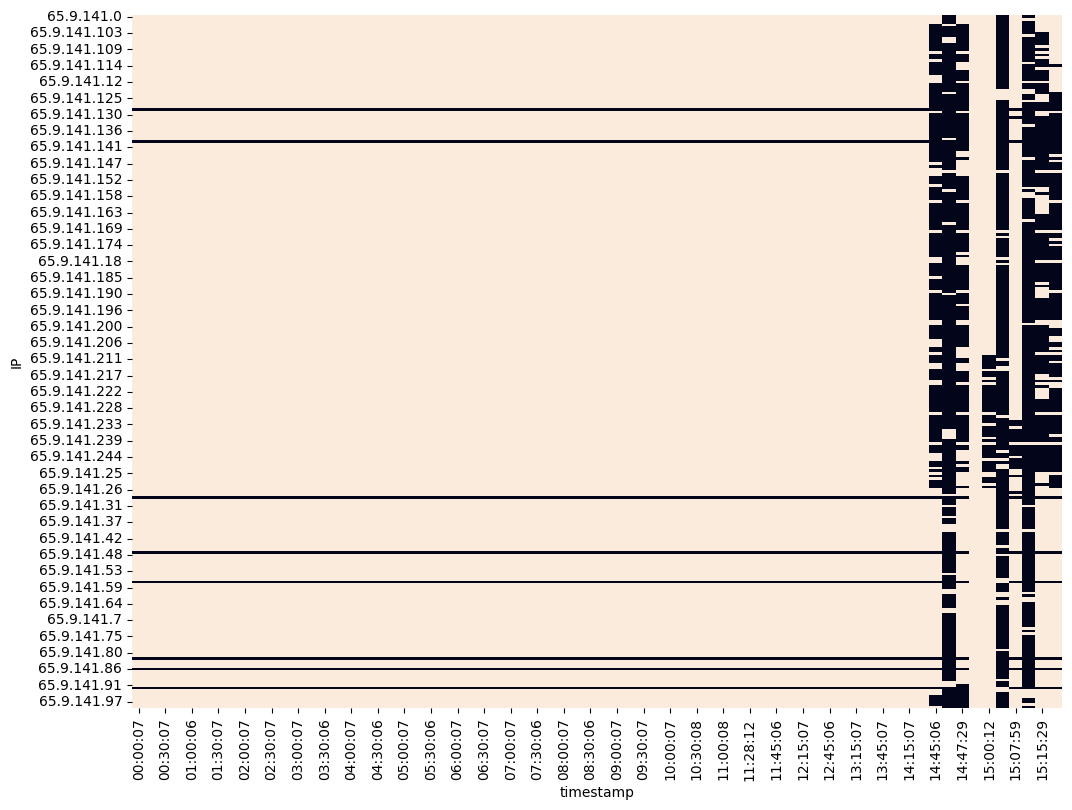

In [2]:
sns.heatmap(df.pivot_table(index="IP", columns="timestamp", values="STATUS"), cbar=False)

In [3]:
vc = df[df.STATUS != 1].IP.value_counts()
bad_ips = sorted(vc[vc > 20].index.tolist())
for ip in bad_ips:
  print(ip)

65.9.141.129
65.9.141.14
65.9.141.29
65.9.141.47
65.9.141.57
65.9.141.82
65.9.141.86
65.9.141.92
